In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import svm
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [17]:
data.head() #seeing the first 5 rows of the data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
data.isnull().sum(axis=0) > 0 # checking for null values

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [19]:
data.bmi = data.bmi.fillna(data.bmi.mean()) #replacing the null values with the mean
data.isnull().sum() > 0 # checking for null values

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [20]:
data = pd.get_dummies(data,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=False)
data.head() #we encodded the Catgorcial Varribles into Numric Forms

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


<AxesSubplot: >

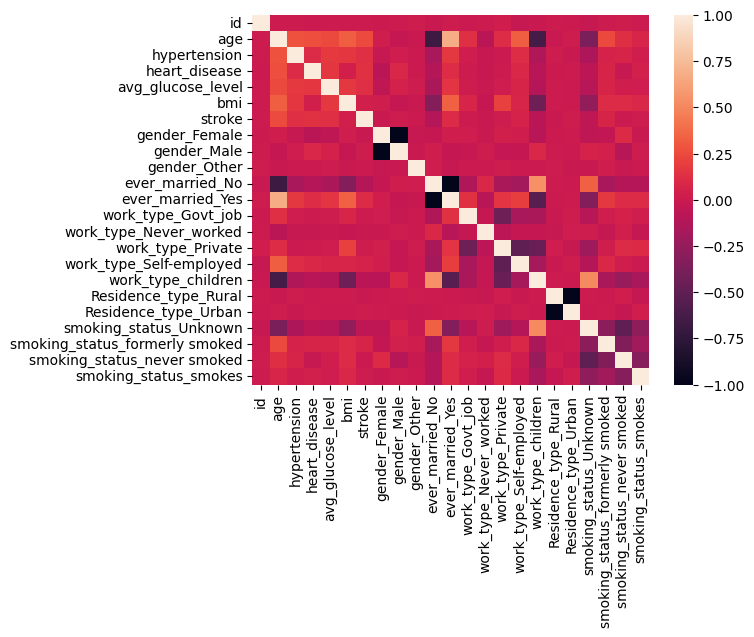

In [21]:
sns.heatmap(data.corr()) # seeing the corrleaiton between the Numrical Features

In [22]:
corr_matrix = pd.DataFrame(data.corr()).sort_values(by='stroke',ascending=False) #corrleaiton Matrix
corr_matrix #to see how much correaltion the target varible have with other varbiles

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,-0.009027,0.009117,-0.003166,...,-0.014882,0.011888,0.062168,-0.083869,-0.015458,0.015458,-0.055892,0.064556,-0.004129,0.008939
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,0.027924,-0.027623,-0.010659,...,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,-0.085617,0.085717,-0.003343,...,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,-0.054902,0.054580,0.011489,...,-0.014675,0.016588,0.062694,-0.102250,0.004946,-0.004946,-0.095131,0.068111,0.023885,0.017646
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,-0.021143,0.021275,-0.004597,...,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
ever_married_Yes,0.013690,0.679125,0.164243,0.114644,0.155068,0.335705,0.108340,0.030483,-0.029936,-0.019327,...,-0.090838,0.153830,0.192716,-0.544441,-0.006261,0.006261,-0.332081,0.171256,0.102845,0.105226
smoking_status_formerly smoked,0.007812,0.236897,0.058853,0.066804,0.068111,0.104257,0.064556,-0.043603,0.042738,0.030568,...,-0.030095,0.025526,0.093260,-0.160668,-0.007654,0.007654,-0.301156,1.000000,-0.350934,-0.195571
work_type_Self-employed,-0.019956,0.327989,0.115442,0.086760,0.062694,0.070822,0.062168,0.026143,-0.025971,-0.006112,...,-0.028728,-0.505475,1.000000,-0.172180,-0.010594,0.010594,-0.106250,0.093260,0.030668,-0.003626
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,0.025797,-0.025464,-0.011802,...,-0.028600,0.203884,0.070822,-0.442843,0.000120,-0.000120,-0.264956,0.104257,0.106220,0.085579
Residence_type_Urban,-0.001403,0.014180,-0.007913,0.003092,-0.004946,-0.000120,0.015458,0.006340,-0.005937,-0.014217,...,0.022859,-0.018173,0.010594,-0.002309,-1.000000,1.000000,-0.002036,0.007654,-0.024466,0.027266


In [23]:
stroke = data.loc[:,['stroke']] #this proceses is just to move the Target Varible to last colunm to make it easy to slice later
data.drop('stroke',inplace=True ,axis=1)
data['stroke'] = stroke
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,67.0,0,1,228.69,36.600000,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.500000,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
3,60182,49.0,0,0,171.23,34.400000,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5106,44873,81.0,0,0,125.20,40.000000,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5107,19723,35.0,0,0,82.99,30.600000,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5108,37544,51.0,0,0,166.29,25.600000,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [47]:
features_names = [] #Extrating Feature Names
index = 0 
for i in data.columns:
    features_names.append(i)
indexs = [range(0,len(features_names)-1)]
features_names.pop()
del features_names[0]
print(features_names)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [54]:
x = data.loc[:,features_names] #lets split the data to an X contining the Featuers and Y containing the Target
y = data.loc[:,['stroke']]
X = np.array(x)
Y = np.array(y).reshape(-1,)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [55]:
#this RidgeCV Model shall give us the best Featuers to train the model with
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, Y)
importance = np.abs(ridge.coef_)
feature_names = np.array(features_names)

In [50]:
# SequentialFeatureSelector Method to select the Featuers
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=4, direction="forward"
).fit(X, Y)
fwd = feature_names[sfs_forward.get_support()]

sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=4, direction="backward"
).fit(X, Y)
bwd = feature_names[sfs_backward.get_support()]
print(
    "Features selected by forward sequential selection: "
    f"{fwd}"
)
print(
    "Features selected by backward sequential selection: "
    f"{bwd}"
)

Features selected by forward sequential selection: ['age' 'hypertension' 'heart_disease' 'avg_glucose_level']
Features selected by backward sequential selection: ['smoking_status_Unknown' 'smoking_status_formerly smoked'
 'smoking_status_never smoked' 'smoking_status_smokes']


In [51]:
new_Feats = ['age','hypertension','heart_disease','smoking_status_Unknown',
             'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

In [56]:
x = data.loc[:,new_Feats] # prepearing the new Featuers
y = data.loc[:,['stroke']]
X = np.array(x)
Y = np.array(y).reshape(-1,)
NX_train, NX_test, Ny_train,Ny_test = train_test_split(X, Y, test_size = 0.30) # spliting the data to test it later

In [57]:
clf = svm.SVC() #Support Vector Machine Model
svm_model = clf.fit(X_train, y_train)
svm_score = svm_model.score(X_test,y_test)
print(svm_score) #before Feature Seleciton

0.9478147423352903


In [58]:
clf = svm.SVC() #Support Vector Machine Model
svm_model = clf.fit(NX_train, Ny_train)
svm_score = svm_model.score(NX_test,Ny_test)
print(svm_score) #after Feature Seleciton

0.9504240052185258


In [59]:
clf = KNeighborsClassifier(n_neighbors=5) # with 5 neighbors
neight_model=clf.fit(NX_train,Ny_train)
neight_score=neight_model.score(NX_test,Ny_test)
print(neight_score)

0.9465101108936725


In [60]:
clf = KNeighborsClassifier(n_neighbors=3) # with 3 neighbors
neight_model=clf.fit(NX_train,Ny_train)
neight_score=neight_model.score(NX_test,Ny_test)
print(neight_score)

0.9478147423352903


In [61]:
clf = KNeighborsClassifier(n_neighbors=11) # with 11 neighbors
neight_model=clf.fit(NX_train,Ny_train)
neight_score=neight_model.score(NX_test,Ny_test)
print(neight_score)

0.9497716894977168


In [62]:
clf = DecisionTreeClassifier() 
ds_model=clf.fit(NX_train,Ny_train)
ds_score=ds_model.score(NX_test,Ny_test)
print(ds_score)

0.9432485322896281


In [66]:
clf = RandomForestClassifier() 
rf_model=clf.fit(NX_train,Ny_train)
rf_score=rf_model.score(NX_test,Ny_test)
print(rf_score)

0.9386823222439661


In [67]:

Accurcy = [ds_score,neight_score,svm_score,rf_score]
models = ['Decision Tree','Nearest Nerbior','Support Vector Machine','Random Forest']

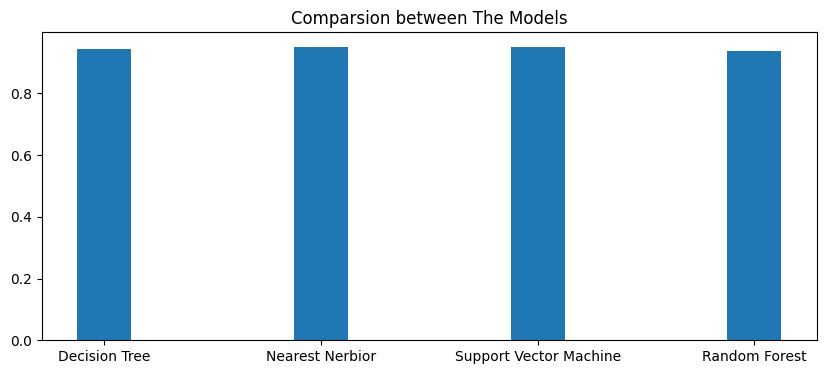

In [74]:
fig = plt.figure(figsize =(10, 4))
plt.bar(models,Accurcy,width=0.25) # lets compare the Models
plt.title('Comparsion between The Models')
plt.show()

In [42]:
# so Far we have a draw between The knn and svm Models